In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Input data (baseline trial)

orig_data = pd.DataFrame(
    data = np.array([ # Absorbance
        [0.003, 0.076, 0.162],
        [0.005, 0.126, 0.189],
        [0.010, 0.127, 0.224],
        [0.027, 0.173, 0.292],
        [0.053, 0.183, 0.317]
    ]),
    index = [ # Row labels = mL 25 mM NPP
        0.05,
        0.1,
        0.2,
        0.5,
        1.0
    ],
    columns = [ # Column labels: time (min)
        0,
        10,
        20
    ]
)

orig_data.rename_axis(index='Substrate amt. (mL 25 mM NPP)',
                      columns='Time (min)')

Time (min),0,10,20
Substrate amt. (mL 25 mM NPP),,,
0.05,0.003,0.076,0.162
0.10,0.005,0.126,0.189
0.20,0.010,0.127,0.224
0.50,0.027,0.173,0.292
1.00,0.053,0.183,0.317


In [3]:
# Input data (inhibition trial)

inhb_data = pd.DataFrame(
    data = np.array([ # Absorbance
        [0.004, 0.011, 0.022],
        [-0.002, 0.019, 0.053],
        [0.009, 0.051, 0.103],
        [0.018, 0.079, 0.131],
        [0.043, 0.092, 0.193]
    ]),
    index = [ # Row labels = mL 25 mM NPP
        0.05,
        0.1,
        0.2,
        0.5,
        1.0
    ],
    columns = [ # Column labels: time (min)
        0,
        10,
        20
    ]
)

inhb_data.rename_axis(index='Substrate amt. (mL 25 mM NPP)',
                      columns='Time (min)')

Time (min),0,10,20
Substrate amt. (mL 25 mM NPP),,,
0.05,0.004,0.011,0.022
0.10,-0.002,0.019,0.053
0.20,0.009,0.051,0.103
0.50,0.018,0.079,0.131
1.00,0.043,0.092,0.193


In [4]:
# Experimental constants
sample_vol = 0.0045 # (L) = 0.001 L/mL * 4.5 mL
absorptivity = 11.8e3 # cm^-1 M^-1 (measured in class by Prof.) SEE Exp 3-BC


In [5]:
# Michaelis-Menten equation
def michaelis_menten_rxn_vel(Vmax, Km, S):
    V0 = (Vmax * S) / (Km + S)
    return V0

# residuals for fitting the michaelis-menten equation
def michaelis_menten_resid(params,
                           conc,
                           obs_vel):
    
    Vmax = params[0]
    Km = params[1]
    
    return obs_vel - michaelis_menten_rxn_vel(Vmax, Km, conc)

# residuals for scaled values (can use w/ absorbance)
def absrb_fit_resid(params,
                    conc,
                    obs_absrb):
    
    Vmax = params[0]
    Km = params[1]
    scl = params[2] # arbitrary scaling factor
    
    return obs_absrb - (scl * michaelis_menten_rxn_vel(Vmax, Km, conc))


`ftol` termination condition is satisfied.
Function evaluations 115, initial cost 1.1987e-01, final cost 2.4189e-04, first-order optimality 3.21e-04.


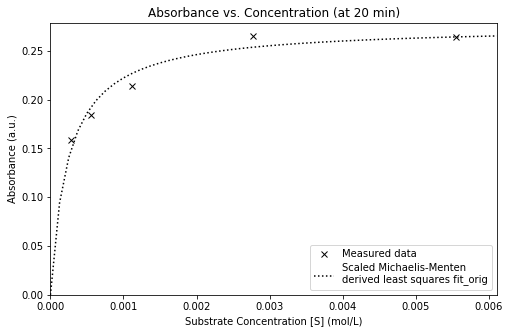

In [6]:
# Scatter plot of Absorbance vs. Concentration
from scipy.optimize import least_squares

# Compute molar concentratio of substrate
# conc. of substrate stock sol'n * mL subst. stock * 0.001 L/mL / sample_vol
S = 0.025 * (0.001 * orig_data.index) / sample_vol # (mol/L)

plt.close()
plt.figure(figsize=(8.0,5.0))
plt.plot(S, orig_data[20] - orig_data[0], 'kx')
fit_orig = least_squares(absrb_fit_resid,
                    [1.0, 1.0, 1.0],
                    args=(S, orig_data[20] - orig_data[0]),
                    method='lm',
                    verbose=2)
ss = np.linspace(0,S.max()*1.1,50)
fit_orig_data = fit_orig.x[2] * michaelis_menten_rxn_vel(fit_orig.x[0], fit_orig.x[1], ss)
plt.plot(ss, fit_orig_data, 'k:')

plt.title('Absorbance vs. Concentration (at 20 min)')
plt.xlabel('Substrate Concentration [S] (mol/L)')
plt.ylabel('Absorbance (a.u.)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data',
    'Scaled Michaelis-Menten\nderived least squares fit_orig'
], loc='lower right')

plt.gcf().set_facecolor('white')
plt.gcf().savefig('Abs_v_Conc_orig_20.png')
plt.show()

`ftol` termination condition is satisfied.
Function evaluations 86, initial cost 3.4617e-02, final cost 2.9104e-04, first-order optimality 1.31e-04.


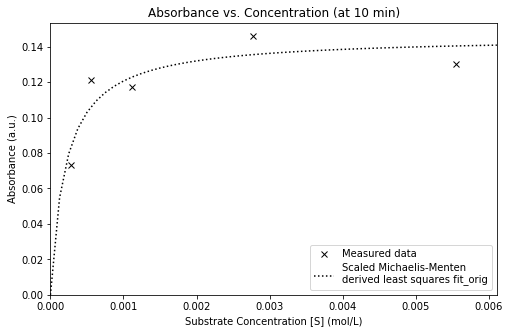

In [7]:
# Scatter plot of Absorbance vs. Concentration
from scipy.optimize import least_squares

# Compute molar concentratio of substrate
# conc. of substrate stock sol'n * mL subst. stock * 0.001 L/mL / sample_vol
S = 0.025 * (0.001 * orig_data.index) / sample_vol # (mol/L)

plt.close()
plt.figure(figsize=(8.0,5.0))
plt.plot(S, orig_data[10] - orig_data[0], 'kx')
fit_orig = least_squares(absrb_fit_resid,
                    [1.0, 1.0, 1.0],
                    args=(S, orig_data[10] - orig_data[0]),
                    method='lm',
                    verbose=2)
ss = np.linspace(0,S.max()*1.1,50)
fit_orig_data = fit_orig.x[2] * michaelis_menten_rxn_vel(fit_orig.x[0], fit_orig.x[1], ss)
plt.plot(ss, fit_orig_data, 'k:')

plt.title('Absorbance vs. Concentration (at 10 min)')
plt.xlabel('Substrate Concentration [S] (mol/L)')
plt.ylabel('Absorbance (a.u.)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data',
    'Scaled Michaelis-Menten\nderived least squares fit_orig'
], loc='lower right')

plt.gcf().set_facecolor('white')
plt.gcf().savefig('Abs_v_Conc_orig_10.png')
plt.show()

`ftol` termination condition is satisfied.
Function evaluations 103, initial cost 2.2465e-02, final cost 2.0832e-04, first-order optimality 1.91e-05.


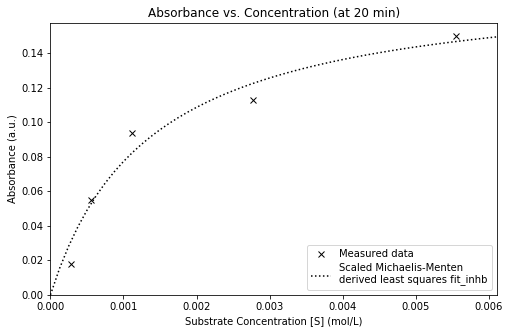

In [8]:
# Scatter plot of Absorbance vs. Concentration
from scipy.optimize import least_squares

# Compute molar concentratio of substrate
# conc. of substrate stock sol'n * mL subst. stock * 0.001 L/mL / sample_vol
S = 0.025 * (0.001 * inhb_data.index) / sample_vol # (mol/L)

plt.close()
plt.figure(figsize=(8.0,5.0))
plt.plot(S, inhb_data[20] - inhb_data[0], 'kx')
fit_inhb = least_squares(absrb_fit_resid,
                    [1.0, 1.0, 1.0],
                    args=(S, inhb_data[20] - inhb_data[0]),
                    method='lm',
                    verbose=2)
ss = np.linspace(0,S.max()*1.1,50)
fit_inhb_data = fit_inhb.x[2] * michaelis_menten_rxn_vel(fit_inhb.x[0], fit_inhb.x[1], ss)
plt.plot(ss, fit_inhb_data, 'k:')

plt.title('Absorbance vs. Concentration (at 20 min)')
plt.xlabel('Substrate Concentration [S] (mol/L)')
plt.ylabel('Absorbance (a.u.)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data',
    'Scaled Michaelis-Menten\nderived least squares fit_inhb'
], loc='lower right')

plt.gcf().set_facecolor('white')
plt.gcf().savefig('Abs_v_Conc_inhb_20.png')
plt.show()

`ftol` termination condition is satisfied.
Function evaluations 123, initial cost 3.7080e-03, final cost 1.5211e-04, first-order optimality 5.17e-06.


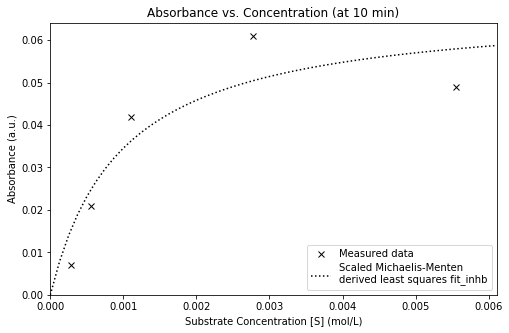

In [9]:
# Scatter plot of Absorbance vs. Concentration
from scipy.optimize import least_squares

# Compute molar concentratio of substrate
# conc. of substrate stock sol'n * mL subst. stock * 0.001 L/mL / sample_vol
S = 0.025 * (0.001 * inhb_data.index) / sample_vol # (mol/L)

plt.close()
plt.figure(figsize=(8.0,5.0))
plt.plot(S, inhb_data[10] - inhb_data[0], 'kx')
fit_inhb = least_squares(absrb_fit_resid,
                    [1.0, 1.0, 1.0],
                    args=(S, inhb_data[10] - inhb_data[0]),
                    method='lm',
                    verbose=2)
ss = np.linspace(0,S.max()*1.1,50)
fit_inhb_data = fit_inhb.x[2] * michaelis_menten_rxn_vel(fit_inhb.x[0], fit_inhb.x[1], ss)
plt.plot(ss, fit_inhb_data, 'k:')

plt.title('Absorbance vs. Concentration (at 10 min)')
plt.xlabel('Substrate Concentration [S] (mol/L)')
plt.ylabel('Absorbance (a.u.)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data',
    'Scaled Michaelis-Menten\nderived least squares fit_inhb'
], loc='lower right')

plt.gcf().set_facecolor('white')
plt.gcf().savefig('Abs_v_Conc_inhb_10.png')
plt.show()

`ftol` termination condition is satisfied.
Function evaluations 115, initial cost 1.1987e-01, final cost 2.4189e-04, first-order optimality 3.21e-04.
`ftol` termination condition is satisfied.
Function evaluations 86, initial cost 3.4617e-02, final cost 2.9104e-04, first-order optimality 1.31e-04.


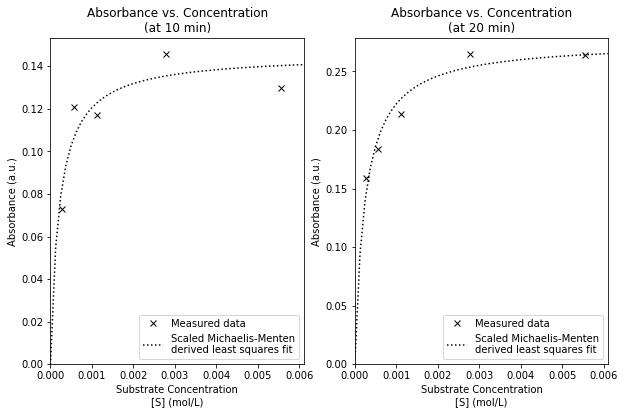

In [10]:
# Scatter plot of Absorbance vs. Concentration
from scipy.optimize import least_squares

# Compute molar concentratio of substrate
# conc. of substrate stock sol'n * mL subst. stock * 0.001 L/mL / sample_vol
S = 0.025 * (0.001 * orig_data.index) / sample_vol # (mol/L)

plt.close()
plt.figure(figsize=(10.0,6.0))

plt.subplot(122)
plt.plot(S, orig_data[20] - orig_data[0], 'kx')
fit_orig = least_squares(absrb_fit_resid,
                    [1.0, 1.0, 1.0],
                    args=(S, orig_data[20] - orig_data[0]),
                    method='lm',
                    verbose=2)
ss = np.linspace(0,S.max()*1.1,50)
fit_orig_data = fit_orig.x[2] * michaelis_menten_rxn_vel(fit_orig.x[0], fit_orig.x[1], ss)
plt.plot(ss, fit_orig_data, 'k:')

plt.title('Absorbance vs. Concentration\n(at 20 min)')
plt.xlabel('Substrate Concentration\n[S] (mol/L)')
plt.ylabel('Absorbance (a.u.)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data',
    'Scaled Michaelis-Menten\nderived least squares fit'
], loc='lower right')

plt.subplot(121)
plt.plot(S, orig_data[10] - orig_data[0], 'kx')
fit_orig = least_squares(absrb_fit_resid,
                    [1.0, 1.0, 1.0],
                    args=(S, orig_data[10] - orig_data[0]),
                    method='lm',
                    verbose=2)
ss = np.linspace(0,S.max()*1.1,50)
fit_orig_data = fit_orig.x[2] * michaelis_menten_rxn_vel(fit_orig.x[0], fit_orig.x[1], ss)
plt.plot(ss, fit_orig_data, 'k:')

plt.title('Absorbance vs. Concentration\n(at 10 min)')
plt.xlabel('Substrate Concentration\n[S] (mol/L)')
plt.ylabel('Absorbance (a.u.)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data',
    'Scaled Michaelis-Menten\nderived least squares fit'
], loc='lower right')

plt.gcf().set_facecolor('white')
plt.gcf().savefig('Abs_v_Conc_orig.png')
plt.show()

`ftol` termination condition is satisfied.
Function evaluations 103, initial cost 2.2465e-02, final cost 2.0832e-04, first-order optimality 1.91e-05.
`ftol` termination condition is satisfied.
Function evaluations 123, initial cost 3.7080e-03, final cost 1.5211e-04, first-order optimality 5.17e-06.


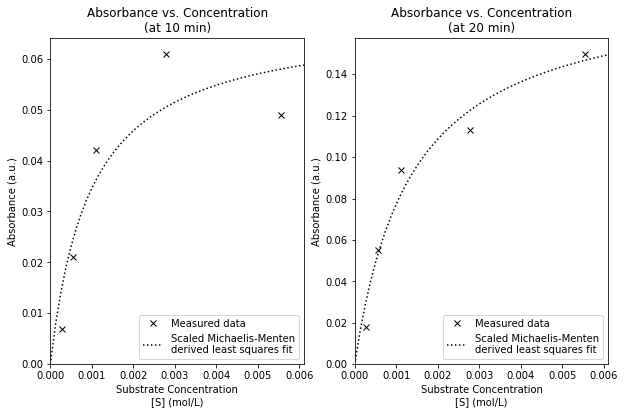

In [11]:
# Scatter plot of Absorbance vs. Concentration
from scipy.optimize import least_squares

# Compute molar concentratio of substrate
# conc. of substrate stock sol'n * mL subst. stock * 0.001 L/mL / sample_vol
S = 0.025 * (0.001 * inhb_data.index) / sample_vol # (mol/L)

plt.close()
plt.figure(figsize=(10.0,6.0))

plt.subplot(122)
plt.plot(S, inhb_data[20] - inhb_data[0], 'kx')
fit_inhb = least_squares(absrb_fit_resid,
                    [1.0, 1.0, 1.0],
                    args=(S, inhb_data[20] - inhb_data[0]),
                    method='lm',
                    verbose=2)
ss = np.linspace(0,S.max()*1.1,50)
fit_inhb_data = fit_inhb.x[2] * michaelis_menten_rxn_vel(fit_inhb.x[0], fit_inhb.x[1], ss)
plt.plot(ss, fit_inhb_data, 'k:')

plt.title('Absorbance vs. Concentration\n(at 20 min)')
plt.xlabel('Substrate Concentration\n[S] (mol/L)')
plt.ylabel('Absorbance (a.u.)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data',
    'Scaled Michaelis-Menten\nderived least squares fit'
], loc='lower right')

plt.subplot(121)
plt.plot(S, inhb_data[10] - inhb_data[0], 'kx')
fit_inhb = least_squares(absrb_fit_resid,
                    [1.0, 1.0, 1.0],
                    args=(S, inhb_data[10] - inhb_data[0]),
                    method='lm',
                    verbose=2)
ss = np.linspace(0,S.max()*1.1,50)
fit_inhb_data = fit_inhb.x[2] * michaelis_menten_rxn_vel(fit_inhb.x[0], fit_inhb.x[1], ss)
plt.plot(ss, fit_inhb_data, 'k:')

plt.title('Absorbance vs. Concentration\n(at 10 min)')
plt.xlabel('Substrate Concentration\n[S] (mol/L)')
plt.ylabel('Absorbance (a.u.)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data',
    'Scaled Michaelis-Menten\nderived least squares fit'
], loc='lower right')

plt.gcf().set_facecolor('white')
plt.gcf().savefig('Abs_v_Conc_inhb.png')
plt.show()

`ftol` termination condition is satisfied.
Function evaluations 115, initial cost 1.1987e-01, final cost 2.4189e-04, first-order optimality 3.21e-04.
`ftol` termination condition is satisfied.
Function evaluations 103, initial cost 2.2465e-02, final cost 2.0832e-04, first-order optimality 1.91e-05.
`ftol` termination condition is satisfied.
Function evaluations 86, initial cost 3.4617e-02, final cost 2.9104e-04, first-order optimality 1.31e-04.
`ftol` termination condition is satisfied.
Function evaluations 123, initial cost 3.7080e-03, final cost 1.5211e-04, first-order optimality 5.17e-06.


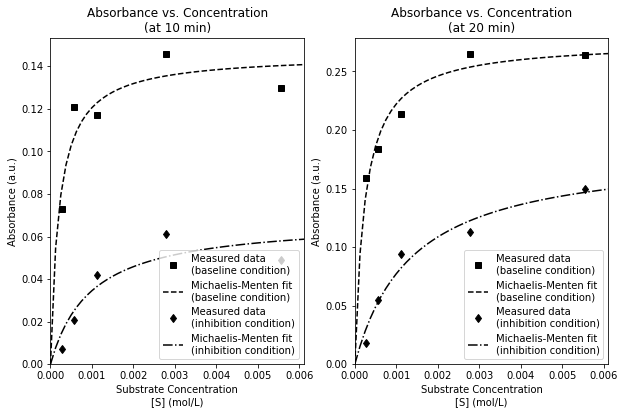

In [12]:
# Comparison figure

plt.close()
plt.figure(figsize=(10.0, 6.0))

plt.subplot(122)
plt.plot(S, orig_data[20] - orig_data[0], 'ks')
fit_orig = least_squares(absrb_fit_resid,
                    [1.0, 1.0, 1.0],
                    args=(S, orig_data[20] - orig_data[0]),
                    method='lm',
                    verbose=2)
ss = np.linspace(0,S.max()*1.1,50)
fit_orig_data = fit_orig.x[2] * michaelis_menten_rxn_vel(fit_orig.x[0], fit_orig.x[1], ss)
plt.plot(ss, fit_orig_data, 'k--')

plt.plot(S, inhb_data[20] - inhb_data[0], 'kd')
fit_inhb = least_squares(absrb_fit_resid,
                    [1.0, 1.0, 1.0],
                    args=(S, inhb_data[20] - inhb_data[0]),
                    method='lm',
                    verbose=2)
ss = np.linspace(0,S.max()*1.1,50)
fit_inhb_data = fit_inhb.x[2] * michaelis_menten_rxn_vel(fit_inhb.x[0], fit_inhb.x[1], ss)
plt.plot(ss, fit_inhb_data, 'k-.')

plt.title('Absorbance vs. Concentration\n(at 20 min)')
plt.xlabel('Substrate Concentration\n[S] (mol/L)')
plt.ylabel('Absorbance (a.u.)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data\n(baseline condition)',
    'Michaelis-Menten fit\n(baseline condition)',
    'Measured data\n(inhibition condition)',
    'Michaelis-Menten fit\n(inhibition condition)'
], loc='lower right')

plt.subplot(121)
plt.plot(S, orig_data[10] - orig_data[0], 'ks')
fit_orig = least_squares(absrb_fit_resid,
                    [1.0, 1.0, 1.0],
                    args=(S, orig_data[10] - orig_data[0]),
                    method='lm',
                    verbose=2)
ss = np.linspace(0,S.max()*1.1,50)
fit_orig_data = fit_orig.x[2] * michaelis_menten_rxn_vel(fit_orig.x[0], fit_orig.x[1], ss)
plt.plot(ss, fit_orig_data, 'k--')

plt.plot(S, inhb_data[10] - inhb_data[0], 'kd')
fit_inhb = least_squares(absrb_fit_resid,
                    [1.0, 1.0, 1.0],
                    args=(S, inhb_data[10] - inhb_data[0]),
                    method='lm',
                    verbose=2)
ss = np.linspace(0,S.max()*1.1,50)
fit_inhb_data = fit_inhb.x[2] * michaelis_menten_rxn_vel(fit_inhb.x[0], fit_inhb.x[1], ss)
plt.plot(ss, fit_inhb_data, 'k-.')

plt.title('Absorbance vs. Concentration\n(at 10 min)')
plt.xlabel('Substrate Concentration\n[S] (mol/L)')
plt.ylabel('Absorbance (a.u.)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data\n(baseline condition)',
    'Michaelis-Menten fit\n(baseline condition)',
    'Measured data\n(inhibition condition)',
    'Michaelis-Menten fit\n(inhibition condition)'
], loc='lower right')

plt.gcf().set_facecolor('white')
plt.gcf().savefig('Abs_v_Conc_comp.png')
plt.show()

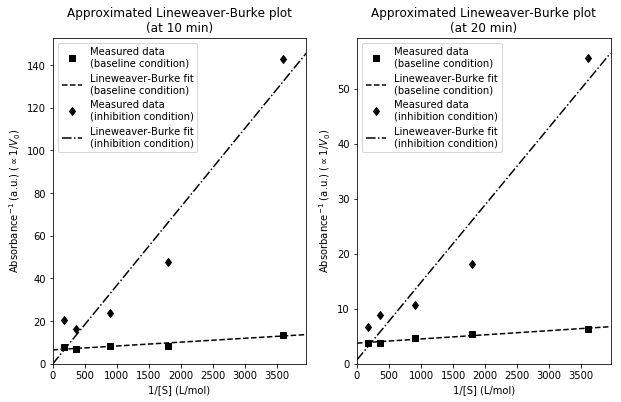

In [13]:
# Lineweaver-Burke plot (scaled)
# NOTE: Absorbance stands in for velocity

plt.close()
plt.figure(figsize=(10.0, 6.0))

plt.subplot(122)
plt.plot(1/S, 1/(orig_data[20] - orig_data[0]), 'ks')

#Linear fit
fit = np.polyfit(1/S, 1/(orig_data[20] - orig_data[0]), 1)
fit_orig_data = np.poly1d(fit)

ss = np.linspace(0,(1/S).max()*1.1,50)
plt.plot(ss, fit_orig_data(ss), 'k--')

plt.plot(1/S, 1/(inhb_data[20] - inhb_data[0]), 'kd')
#Linear fit
fit = np.polyfit(1/S, 1/(inhb_data[20] - inhb_data[0]), 1)
fit_inhb_data = np.poly1d(fit)

ss = np.linspace(0,(1/S).max()*1.1,50)
plt.plot(ss, fit_inhb_data(ss), 'k-.')

plt.title('Approximated Lineweaver-Burke plot\n(at 20 min)')
plt.xlabel('1/[S] (L/mol)')
plt.ylabel('Absorbance$^{-1}$ (a.u.) ($\propto 1/V_0$)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data\n(baseline condition)',
    'Lineweaver-Burke fit\n(baseline condition)',
    'Measured data\n(inhibition condition)',
    'Lineweaver-Burke fit\n(inhibition condition)'
], loc='upper left')

plt.subplot(121)
plt.plot(1/S, 1/(orig_data[10] - orig_data[0]), 'ks')

#Linear fit
fit = np.polyfit(1/S, 1/(orig_data[10] - orig_data[0]), 1)
fit_orig_data = np.poly1d(fit)

ss = np.linspace(0,(1/S).max()*1.1,50)
plt.plot(ss, fit_orig_data(ss), 'k--')

plt.plot(1/S, 1/(inhb_data[10] - inhb_data[0]), 'kd')
#Linear fit
fit = np.polyfit(1/S, 1/(inhb_data[10] - inhb_data[0]), 1)
fit_inhb_data = np.poly1d(fit)

ss = np.linspace(0,(1/S).max()*1.1,50)
plt.plot(ss, fit_inhb_data(ss), 'k-.')

plt.title('Approximated Lineweaver-Burke plot\n(at 10 min)')
plt.xlabel('1/[S] (L/mol)')
plt.ylabel('Absorbance$^{-1}$ (a.u.) ($\propto 1/V_0$)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data\n(baseline condition)',
    'Lineweaver-Burke fit\n(baseline condition)',
    'Measured data\n(inhibition condition)',
    'Lineweaver-Burke fit\n(inhibition condition)'
], loc='upper left')

plt.gcf().set_facecolor('white')
plt.gcf().savefig('Approx_LWB_comp.png')
plt.show()

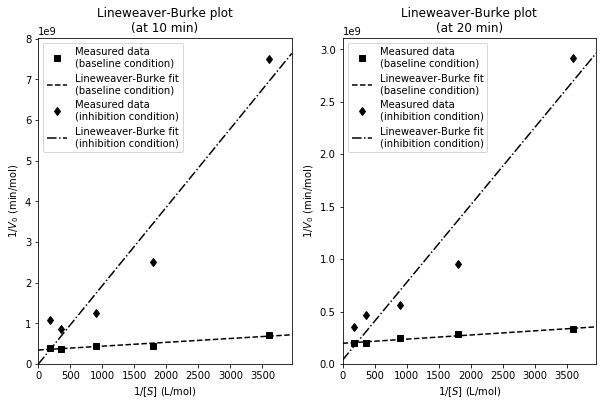

In [14]:
# Lineweaver-Burke plot
# Calculate velocity from absorbance using last week's 
# measured absorptivity

plt.close()
plt.figure(figsize=(10.0, 6.0))

plt.subplot(122)

# Calculate moles
prod_orig_molar_conc_20 = (orig_data[20] - orig_data[0]) / absorptivity
prod_orig_moles_20 = prod_orig_molar_conc_20 * sample_vol
V0_orig_20 = prod_orig_moles_20 / 20 # mol/min
plt.plot(1/S, 1/V0_orig_20, 'ks')

#Linear fit
fit_o20 = np.polyfit(1/S, 1/V0_orig_20, 1)
fit_orig_data = np.poly1d(fit_o20)

ss = np.linspace(0,(1/S).max()*1.1,50)
plt.plot(ss, fit_orig_data(ss), 'k--')

# Calculate moles
prod_inhb_molar_conc_20 = (inhb_data[20] - inhb_data[0]) / absorptivity
prod_inhb_moles_20 = prod_inhb_molar_conc_20 * sample_vol
V0_inhb_20 = prod_inhb_moles_20 / 20 # mol/min
plt.plot(1/S, 1/V0_inhb_20, 'kd')

#Linear fit
fit_i20 = np.polyfit(1/S, 1/V0_inhb_20, 1)
fit_inhb_data = np.poly1d(fit_i20)

ss = np.linspace(0,(1/S).max()*1.1,50)
plt.plot(ss, fit_inhb_data(ss), 'k-.')

plt.title('Lineweaver-Burke plot\n(at 20 min)')
plt.xlabel('$1/[S]$ (L/mol)')
plt.ylabel('$1/V_0$ (min/mol)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data\n(baseline condition)',
    'Lineweaver-Burke fit\n(baseline condition)',
    'Measured data\n(inhibition condition)',
    'Lineweaver-Burke fit\n(inhibition condition)'
], loc='upper left')

plt.subplot(121)

# Calculate moles
prod_orig_molar_conc_10 = (orig_data[10] - orig_data[0]) / absorptivity
prod_orig_moles_10 = prod_orig_molar_conc_10 * sample_vol
V0_orig_10 = prod_orig_moles_10 / 20 # mol/min
plt.plot(1/S, 1/V0_orig_10, 'ks')

#Linear fit
fit_o10 = np.polyfit(1/S, 1/V0_orig_10, 1)
fit_orig_data = np.poly1d(fit_o10)

ss = np.linspace(0,(1/S).max()*1.1,50)
plt.plot(ss, fit_orig_data(ss), 'k--')

# Calculate moles
prod_inhb_molar_conc_10 = (inhb_data[10] - inhb_data[0]) / absorptivity
prod_inhb_moles_10 = prod_inhb_molar_conc_10 * sample_vol
V0_inhb_10 = prod_inhb_moles_10 / 20 # mol/min
plt.plot(1/S, 1/V0_inhb_10, 'kd')

#Linear fit
fit_i10 = np.polyfit(1/S, 1/V0_inhb_10, 1)
fit_inhb_data = np.poly1d(fit_i10)

ss = np.linspace(0,(1/S).max()*1.1,50)
plt.plot(ss, fit_inhb_data(ss), 'k-.')

plt.title('Lineweaver-Burke plot\n(at 10 min)')
plt.xlabel('$1/[S]$ (L/mol)')
plt.ylabel('$1/V_0$ (min/mol)')
plt.xlim([ss[0],ss[-1]])
ybnds = plt.gca().get_ylim()
plt.ylim([0,ybnds[1]])
plt.legend([
    'Measured data\n(baseline condition)',
    'Lineweaver-Burke fit\n(baseline condition)',
    'Measured data\n(inhibition condition)',
    'Lineweaver-Burke fit\n(inhibition condition)'
], loc='upper left')

plt.gcf().set_facecolor('white')
plt.gcf().savefig('LWB_comp.png')
plt.show()

In [15]:
print('Baseline @ 10 min: Km = {:f} mol/L, Vmax = {:0.12f} mol/min'.format(
    fit_o10[0] / fit_o10[1],
    1 / fit_o10[1]
))
print('Baseline @ 20 min: Km = {:f} mol/L, Vmax = {:0.12f} mol/min'.format(
    fit_o20[0] / fit_o20[1],
    1 / fit_o20[1]
))
print('Inhibition @ 10 min: Km = {:f} mol/L, Vmax = {:0.12f} mol/min'.format(
    fit_i10[0] / fit_i10[1],
    1 / fit_i10[1]
))
print('Inhibition @ 20 min: Km = {:f} mol/L, Vmax = {:0.12f} mol/min'.format(
    fit_i20[0] / fit_i20[1],
    1 / fit_i20[1]
))

Baseline @ 10 min: Km = 0.000276 mol/L, Vmax = 0.000000002915 mol/min
Baseline @ 20 min: Km = 0.000201 mol/L, Vmax = 0.000000005072 mol/min
Inhibition @ 10 min: Km = -0.327191 mol/L, Vmax = -0.000000169575 mol/min
Inhibition @ 20 min: Km = 0.019649 mol/L, Vmax = 0.000000026609 mol/min


In [16]:
# molar mass of coloured product p-nitrophenol = 139.110 g/mol
print('Baseline @ 10 min: Km = {:f} mM, Vmax = {:0.12f} mg/(L*hr)'.format(
    1e3 * fit_o10[0] / fit_o10[1],
    (1 / fit_o10[1]) * 60 * 139.110 * 1e3 / sample_vol
))
print('Baseline @ 20 min: Km = {:f} mM, Vmax = {:0.12f} mg/(L*hr)'.format(
    1e3 * fit_o20[0] / fit_o20[1],
    (1 / fit_o20[1]) * 60 * 139.110 * 1e3 / sample_vol
))
print('Inhibition @ 10 min: Km = {:f} mM, Vmax = {:0.12f} mg/(L*hr)'.format(
    1e3 * fit_i10[0] / fit_i10[1],
    (1 / fit_i10[1]) * 60 * 139.110 * 1e3 / sample_vol
))
print('Inhibition @ 20 min: Km = {:f} mM, Vmax = {:0.12f} mg/(L*hr)'.format(
    1e3 * fit_i20[0] / fit_i20[1],
    (1 / fit_i20[1]) * 60 * 139.110 * 1e3 / sample_vol
))

Baseline @ 10 min: Km = 0.275871 mM, Vmax = 5.406466184547 mg/(L*hr)
Baseline @ 20 min: Km = 0.200627 mM, Vmax = 9.406631506372 mg/(L*hr)
Inhibition @ 10 min: Km = -327.190698 mM, Vmax = -314.527411397500 mg/(L*hr)
Inhibition @ 20 min: Km = 19.648786 mM, Vmax = 49.354065645203 mg/(L*hr)
